# fxローソク足チャートをプロット

* csvファイルからfxヒストリカルデータを読み出し
* `matplotlib.finance` を利用してローソク足チャートをプロット

In [9]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mf
from matplotlib.dates import date2num
from mplfinance.original_flavor import candlestick_ochl

In [10]:
csv=pd.read_csv('USDJPY60.csv',
                 sep=',',
                 names=('YY.MM.DD', 'HH:MM', 'OPEN', 'HIGH', 'LOW', 'CLOSE', 'VOLUME'),
                 index_col=['YY.MM.DD', 'HH:MM'])

In [11]:
data=csv
#data=csv['2016.11.08':'2016.11.11']
data

OPEN     HIGH      LOW    CLOSE  VOLUME
YY.MM.DD   HH:MM                                            
2016.08.05 22:00  101.738  101.813  101.733  101.753     615
           23:00  101.750  101.825  101.732  101.778    1091
2016.08.08 00:00  101.959  102.000  101.845  101.906    1652
           01:00  101.906  102.257  101.852  102.230    2419
           02:00  102.228  102.253  102.042  102.053    1374
...                   ...      ...      ...      ...     ...
2017.02.17 19:00  112.867  112.896  112.773  112.838    1257
           20:00  112.842  112.885  112.795  112.856     779
           21:00  112.853  112.966  112.849  112.930     843
           22:00  112.926  112.942  112.872  112.919     929
           23:00  112.916  112.918  112.739  112.767    1269

[3312 rows x 5 columns]

In [12]:
date=[]
quote = []
for i, v in data.iterrows():
    t = pd.to_datetime(i[0] + ' ' + i[1]);
    date.append(t)
    quote.append((date2num(t), v['OPEN'], v['CLOSE'], v['HIGH'], v['LOW']))

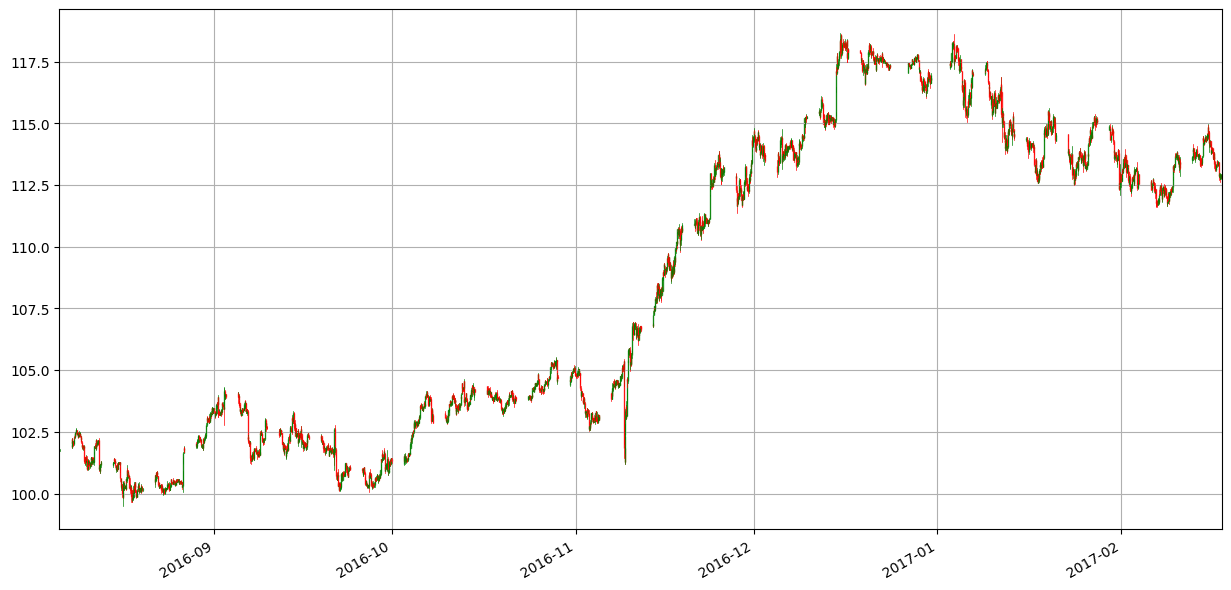

In [13]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.grid()
ax.set_xlim(date[0], date[-1])
candlestick_ochl(ax, quote, width=0.02, colorup='g', colordown='r', alpha=0.75)
fig.autofmt_xdate()
plt.show()